In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import glob, os, json, pickle
import re

import cv2, face_recognition

In [2]:
media_fldr = "./data/og_ad_media/*"
media_fps = glob.glob(media_fldr)

# List all our media files by ID
media_dict = {}
for m in media_fps:
    media_name = os.path.basename(m)
    x = media_name.split("_")
    ad_id, media_type = x[0], x[1]
    
    images = []
    videos = []
    
    if "image" in media_type:
        images.append(m)
    else:
        videos.append(m)
    
    if ad_id in media_dict:
        media_dict[ad_id]['images'].extend(images)
        media_dict[ad_id]['videos'].extend(videos)
    else:
        media_dict[ad_id] = {
            "images": images,
            "videos": videos
        }
media_dict["1008372119347745"]
    

{'images': ['./data/og_ad_media\\1008372119347745_image0.jpg',
  './data/og_ad_media\\1008372119347745_image1.jpg'],
 'videos': []}

In [3]:
# Find all mentions in images and videos
media_mentions = {}
for k, medias in media_dict.items():
    ims, vids = medias['images'], medias['videos']    
    im_mentions, vid_mentions = [], []
    
    for im in ims:
        im_mentions.append((im, ["Fred"]))
    for vid in vids:
        vid_mentions.append((vid, ['Fred', "Fred2"]))
    
    media_mentions[k] = {
        'images': im_mentions,
        'videos': vid_mentions,
    }
media_mentions["1008372119347745"]

{'images': [('./data/og_ad_media\\1008372119347745_image0.jpg', ['Fred']),
  ('./data/og_ad_media\\1008372119347745_image1.jpg', ['Fred'])],
 'videos': []}

In [4]:
with open("./output/candidate_face_encodings.json", "r") as f:
    candidate_face_encodings = json.load(f)

known_names = []
known_faces = []
for k, face in candidate_face_encodings.items():
    if face['face_encoding'] is not None:
        known_names.append(k)
        known_faces.append(face['face_encoding'])
        

In [5]:
import recognize_faces as recog

In [6]:
recog_faces = recog.FaceRecognizer(known_names, known_faces)
fps = [
    './data/og_ad_media\\1008372119347745_image1.jpg',
    './data/og_ad_media\\1007705609401263_image0.jpg',
    './data/og_ad_media\\1010950745744713_image1.jpg'
]

['JOSH_HAWLEY']


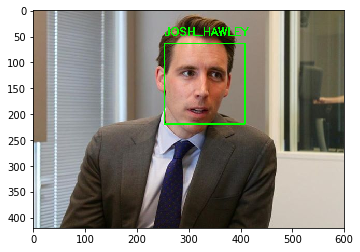

['MANCHIN_III']


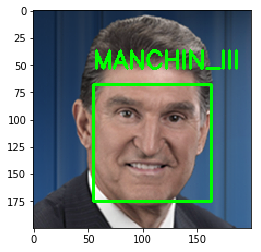

['Unknown', 'BARBARA_COMSTOCK', 'BIBIE_BOERIO', 'ALEXANDRA_CHANDLER', 'BO_COPLEY', 'MICHAEL_WEISS', 'JUANA_MATIAS', 'BOPHA_MALONE', 'BETH_FUKUMOTO', 'BARBARA_COMSTOCK', 'BEEJ_DAS', 'ABIGAIL_SPANBERGER', 'CHRIS_PERRI', 'ALLEN_RHEINHART', 'BOB_LATTA', "BETO_O'ROURKE", 'ALEX_TRIANTAPHYLLIS', 'CARYN_TYSON', 'ANDY_HARRIS', 'ANGELA_MCARDLE', 'ANGELA_MCARDLE', 'LEE_TURNER', 'DAVID_MOORE', 'Unknown']


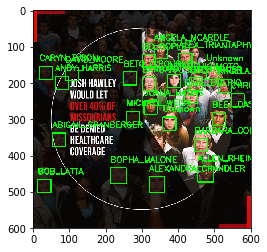

In [15]:
for fp in fps:
    rgb_img = recog_faces.read_image_rgb(fp)
    found_faces = recog_faces.name_all_faces(rgb_img, draw_matches=True)
    print(found_faces['face_names'])
    plt.imshow(found_faces['boxed_img'])
    plt.show()

In [12]:
vid_annot = recog.VideoAnnotator(known_names, known_faces, 5)

In [13]:
mentions = vid_annot.process_vid("./data/radinovich.mp4", "./data/radinovich_boxed2.avi")

Writing frame 5 / 900
Writing frame 10 / 900
Writing frame 15 / 900
Writing frame 20 / 900
Writing frame 25 / 900
Writing frame 30 / 900
Writing frame 35 / 900
Writing frame 40 / 900
Writing frame 45 / 900
Writing frame 50 / 900
Writing frame 55 / 900
Writing frame 60 / 900
Writing frame 65 / 900
Writing frame 70 / 900
Writing frame 75 / 900
Writing frame 80 / 900
Writing frame 85 / 900
Writing frame 90 / 900
Writing frame 95 / 900
Writing frame 100 / 900
Writing frame 105 / 900
Writing frame 110 / 900
Writing frame 115 / 900
Writing frame 120 / 900
Writing frame 125 / 900
Writing frame 130 / 900
Writing frame 135 / 900
Writing frame 140 / 900
Writing frame 145 / 900
Writing frame 150 / 900
Writing frame 155 / 900
Writing frame 160 / 900
Writing frame 165 / 900
Writing frame 170 / 900
Writing frame 175 / 900
Writing frame 180 / 900
Writing frame 185 / 900
Writing frame 190 / 900
Writing frame 195 / 900
Writing frame 200 / 900
Writing frame 205 / 900
Writing frame 210 / 900
Writing fram

In [14]:
mentions

['JOE_RADINOVICH',
 'BRAD_WENSTRUP',
 'CHRISTOPHER_VOEHL',
 'JEFF_JONES',
 'Unknown',
 'ANTHONY_WHITE']

ballotpedia
wikipedia
votesmart